In [1]:
import control as ctrl
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sympy as sym
import ipywidgets as widgets
import IPython as IPy
import csv
import pandas as pd

In [2]:
#################################
# Second-order All-Pole Systems #
#################################

# Symbolic variables
#   k -> DC gain
#   d -> damping ratio
#   w -> Natural frequency
#   H -> Transfer function
k,d,w,H=sym.symbols('k d w H(s)', real=True)

# jw = s
s = sym.Symbol('s')

# Creating and displaying the symbolic transfer function
tf = sym.Eq(H, (k * w**2) / (s**2 + 2 * d * w * s + w**2))
tf

Eq(H(s), k*w**2/(2*d*s*w + s**2 + w**2))

In [3]:
# Importance of damping ratio value

# zeta refers to damping ratio
zeta_initial = 0.7

w = 1
k = 1

num = [k * w**2]
den = [1, 2*w*zeta_initial, w**2]

sys = ctrl.TransferFunction(num, den)

# Changing zeta and updating plot

zeta_slider = widgets.FloatSlider(value=zeta_initial, min=0.1, max=2.0, step=0.1, description='Damping Ratio')

def update_plot(zeta):
    den_updated = [1, 2*zeta, 1]
    sys_updated = ctrl.TransferFunction(num, den_updated)
    time, response = ctrl.step_response(sys_updated)
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(time, response)
    ax.set_xlabel('Time')
    ax.set_ylabel('Response')
    ax.set_title(f'Step Response (Damping Ratio = {zeta})')
    ax.grid(True)
    
    plt.show()

# Connect the slider to the update function
widgets.interactive(update_plot, zeta=zeta_slider)


interactive(children=(FloatSlider(value=0.7, description='Damping Ratio', max=2.0, min=0.1), Output()), _dom_c…

In [4]:
# Analyzing the transient performance

# Gathering transient performance data based on damping ratio
def transient_analysis(zeta, w=1, k=1):
    tc = 1 / (zeta * w) # Time constant
    st_5p = 3 * tc      # 5% settling time
    st_2p = 4 * tc      # 5% settling time
    
    # Overshoot %
    os_p = 100 * np.e**( -(np.pi*zeta) / (np.sqrt(1 - zeta**2)) ) if 1 - zeta**2 > 0 else 0
    return (tc, st_5p, st_2p, os_p)

# Estimations

stats = transient_analysis(zeta_slider.value)
# Overshoot %

print(f'''
Time Constant: {stats[0]}
5% Settling Time: {stats[1]}
2% Settling Time: {stats[2]}
Overshoot %: {stats[3]}
''')

# Some notes
#  zeta < 1  -> Underdamped response
#  zeta == 1 -> Critically damped response
#  zeta > 1  -> Overdamped response
# If you want to test these, I recommend a zeta of
# 0.9 to observe underdamped, 1 to observe critically damped
# and 1.10 to observe overdamped.


Time Constant: 1.4285714285714286
5% Settling Time: 4.285714285714286
2% Settling Time: 5.714285714285714
Overshoot %: 4.598791026026776



In [5]:
headers = ['Damping Ratio', 'Time Constant','5% Settling Time', '2% Settling Time', 'Overshoot %']
data = [[i]+list(transient_analysis(i)) for i in np.arange(0.01, 2.1, 0.01)]

with open('transient_analysis_out.csv', mode='w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(headers)
    writer.writerows(data)



<function matplotlib.pyplot.show(close=None, block=None)>

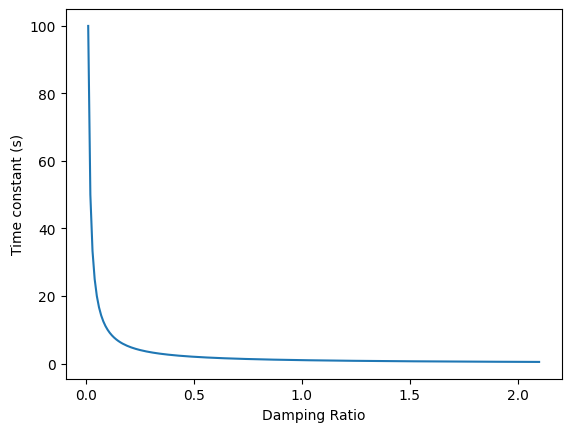

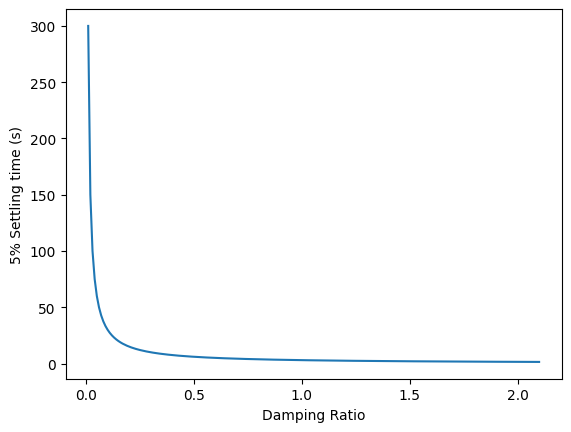

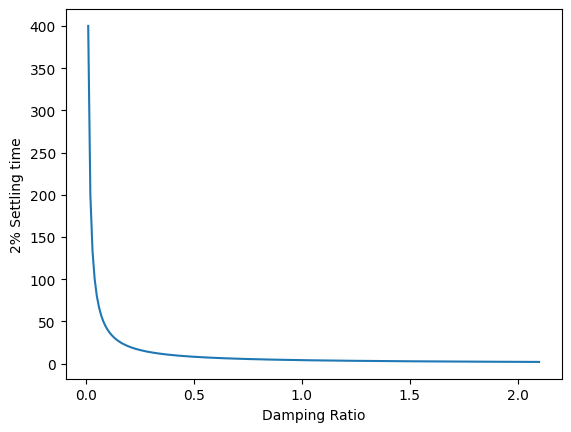

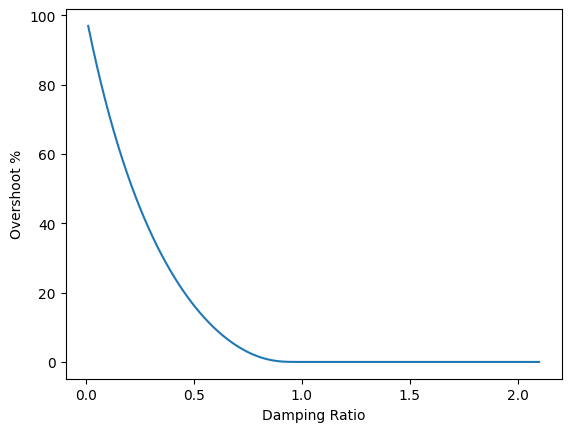

In [6]:
# Using CSV reader here isn't necessary since we already have
# this data, but it is still useful in case we generate different
# data later that is separate from this notebook

zeta_vals = []
tc_vals = []
st_5p_vals = []
st_2p_vals = []
os_p_vals = []

with open('transient_analysis_out.csv', mode='r', newline='') as csv_file:
    df = pd.read_csv(csv_file)
    zeta_vals = df['Damping Ratio']
    tc_vals = df['Time Constant']
    st_5p_vals = df['5% Settling Time']
    st_2p_vals = df['2% Settling Time']
    os_p_vals = df['Overshoot %']

plt.figure()
plt.plot(zeta_vals, tc_vals)
plt.xlabel('Damping Ratio')
plt.ylabel('Time constant (s)')
plt.show

plt.figure()
plt.plot(zeta_vals, st_5p_vals)
plt.xlabel('Damping Ratio')
plt.ylabel('5% Settling time (s)')
plt.show

plt.figure()
plt.plot(zeta_vals, st_2p_vals)
plt.xlabel('Damping Ratio')
plt.ylabel('2% Settling time')
plt.show

plt.figure()
plt.plot(zeta_vals, os_p_vals)
plt.xlabel('Damping Ratio')
plt.ylabel('Overshoot %')
plt.show
